## Lead Scoring Case Study

## Problem statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. The typical lead conversion rate at X education is around 30%. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Goal
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. 

## Step 1: Importing  Data and Inspecting the Dataframe

In [11]:
# Importing the IMP library
import pandas as pd
import numpy as np


#Imprting the library to avoid wanings
import warnings
warnings.filterwarnings("ignore")


In [12]:
#Importing the Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Reading The given datasets
ld_df=pd.read_csv("Leads.csv")

In [14]:
# Let's see the head of dataset
ld_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [15]:
ld_df.describe() # describe the stastical information of all numeric columns

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [16]:
# Let's see the type of each column
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [17]:
# Select all non-numeric columns
s_df = ld_df.select_dtypes(include='object')

# Find out columns that have "Select"
s = lambda x: x.str.contains('Select', na=False)
l = s_df.columns[s_df.apply(s).any()].tolist()
print (l)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [18]:
# select all the columns that have a "Select" entry
sel_cols =['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']
# replace values
ld_df[sel_cols] = ld_df[sel_cols].replace('Select', np.NaN)

In [19]:
# Check NULL values
ld_df_null=round(100*ld_df.isnull().mean(),2)
ld_df_null

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 


Asymmetrique Activity Index    has                  45.65%
Asymmetrique Profile Index    has                   45.65%
Asymmetrique Activity Score    has                  45.65%
Asymmetrique Profile Score     has                  45.65%
Lead Quality                  has                   51.59%

Lead Profile      has                               74.19%
How did you hear about X Education has 78% null values
it is better to drop these columns


In [20]:
# Check NULL values and drop mean > 0.40
ld_df= ld_df.drop(ld_df.columns[ld_df.isnull().mean() >= 0.40], axis = 1)


In [21]:
#Prospect ID is A unique ID with which the customer is identified so drop it
ld_df=ld_df.drop("Prospect ID",axis=1)


In [22]:
#"Lead Number" is A unique number so drop it
ld_df=ld_df.drop("Lead Number",axis=1)

In [23]:
# Let's check the dimensions of the dataframe
ld_df.shape

(9240, 28)

In [24]:
# Check all columns
ld_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [25]:
# Make a list of continous values by appending
# Make a list of catogerical values by appending 
cont_cols=[]
cat_cols=[]
for i in ld_df.columns:
    if ld_df[i].nunique()>30:
        print(i,ld_df[i].nunique(),  "----cont_cols")
        cont_cols.append(i)
    else:
        print(i,ld_df[i].nunique(),  "----cat_cols")
        cat_cols.append(i)

Lead Origin 5 ----cat_cols
Lead Source 21 ----cat_cols
Do Not Email 2 ----cat_cols
Do Not Call 2 ----cat_cols
Converted 2 ----cat_cols
TotalVisits 41 ----cont_cols
Total Time Spent on Website 1731 ----cont_cols
Page Views Per Visit 114 ----cont_cols
Last Activity 17 ----cat_cols
Country 38 ----cont_cols
Specialization 18 ----cat_cols
What is your current occupation 6 ----cat_cols
What matters most to you in choosing a course 3 ----cat_cols
Search 2 ----cat_cols
Magazine 1 ----cat_cols
Newspaper Article 2 ----cat_cols
X Education Forums 2 ----cat_cols
Newspaper 2 ----cat_cols
Digital Advertisement 2 ----cat_cols
Through Recommendations 2 ----cat_cols
Receive More Updates About Our Courses 1 ----cat_cols
Tags 26 ----cat_cols
Update me on Supply Chain Content 1 ----cat_cols
Get updates on DM Content 1 ----cat_cols
City 6 ----cat_cols
I agree to pay the amount through cheque 1 ----cat_cols
A free copy of Mastering The Interview 2 ----cat_cols
Last Notable Activity 16 ----cat_cols


In [26]:
# Print catogrical values
# Print continuous values
print(cat_cols)
print(cont_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']
['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Country']


In [27]:
# Continous values list
cont_cols=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', ]

In [28]:
# Catogrical values list
cat_cols=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity', 'Specialization', 
         'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article',
         'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'City', 
         'A free copy of Mastering The Interview', 'Last Notable Activity','Country']

In [29]:
# Catogrical values list along with value counts
for i in cat_cols:
    print(i)
    print()
    print(ld_df[i].value_counts())
    print()
    print("percentage",100*ld_df[i].value_counts(normalize=True))
    print("--------------------------------------------------")

Lead Origin

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

percentage Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
--------------------------------------------------
Lead Source

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog  

 Replacing the null values in categorical columns by mode of that respective column

In [30]:
for i in cat_cols:
    if ld_df[i].isnull().sum()>0:
        value=ld_df[i].mode()[0]
        ld_df[i]=ld_df[i].fillna(value)

 Replacing the null values in continuous columns by median of that respective column

In [31]:
for i in cont_cols:
    if ld_df[i].isnull().sum()>0:   
        value=ld_df[i].median()
        ld_df[i]=ld_df[i].fillna(value)

In [32]:
#now check all the null values are replaced or not
ld_df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [33]:
ld_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [34]:
ld_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [35]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

## Step 2. Exploratory Data Analytics
## Univariate Analysis¶
## Converted

Now plot the bar graph for cat_cols columns to visualise the value count of it

Lead Origin


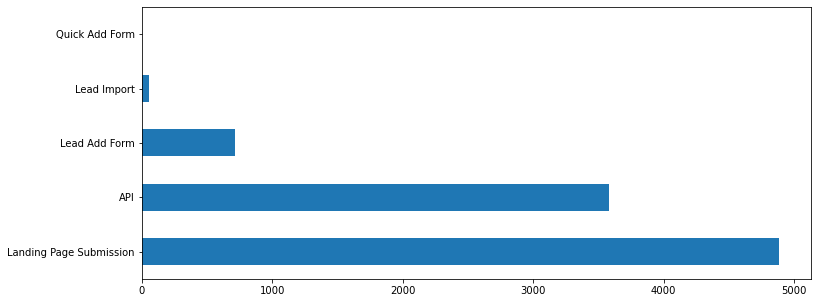

Lead Source


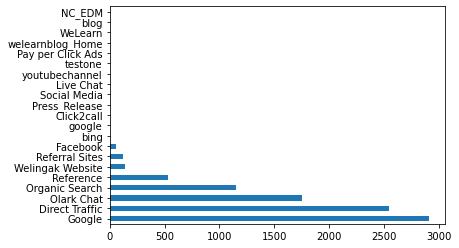

Do Not Email


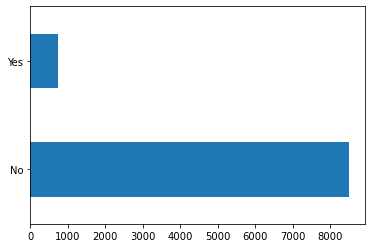

Do Not Call


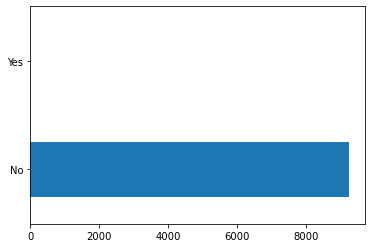

Converted


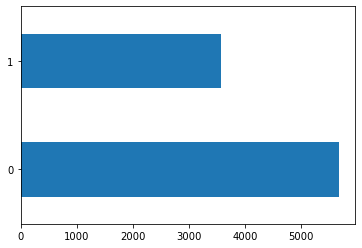

Last Activity


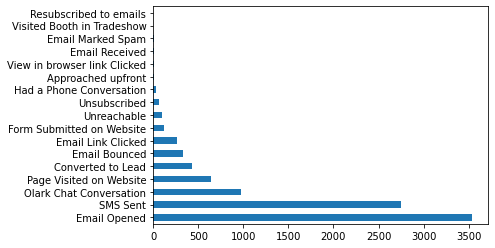

Specialization


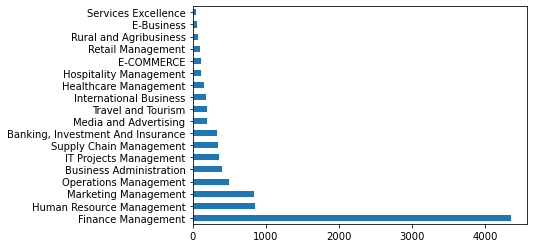

What is your current occupation


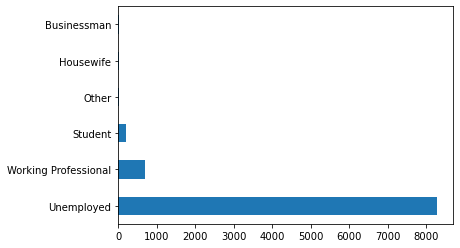

What matters most to you in choosing a course


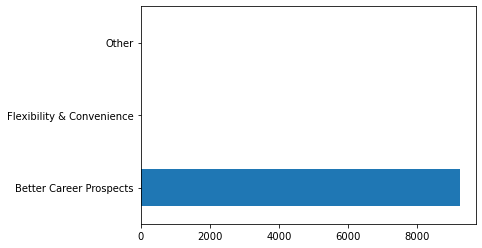

Search


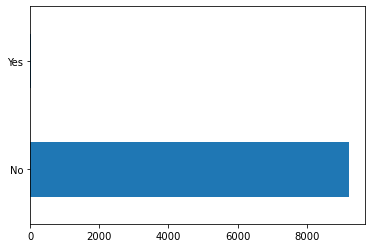

Newspaper Article


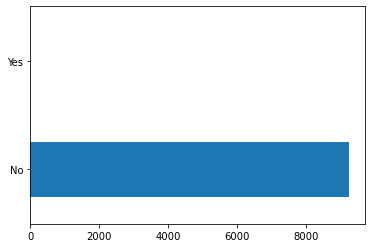

X Education Forums


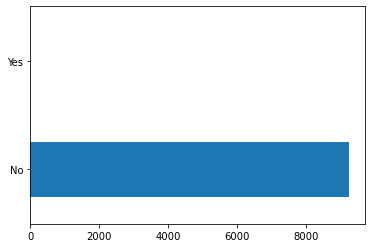

Newspaper


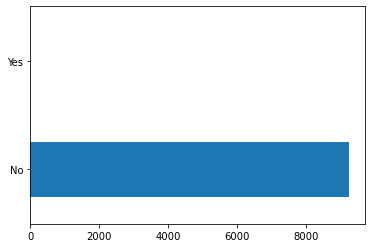

Digital Advertisement


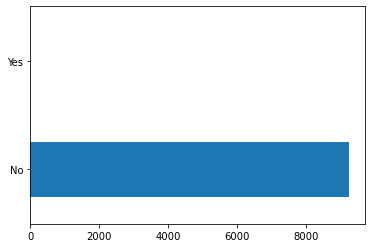

Through Recommendations


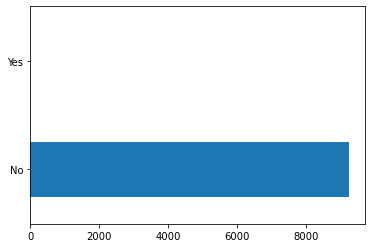

Tags


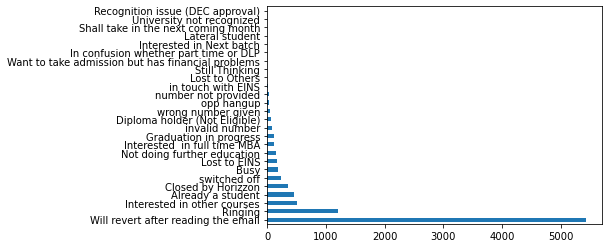

City


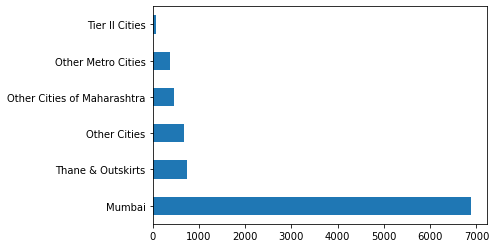

A free copy of Mastering The Interview


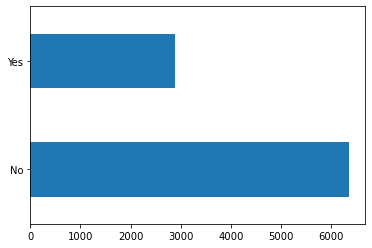

Last Notable Activity


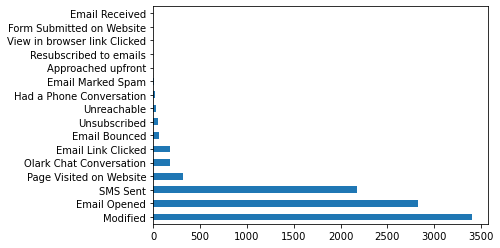

Country


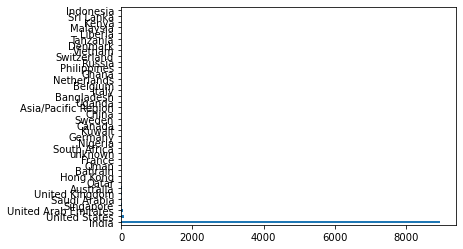

In [36]:
plt.figure(figsize=(12,5))
for i in cat_cols:
    print(i)
    ld_df[i].value_counts().plot.barh(width=.5)
    plt.show()

From the above visualisation following columns have only one value "No" in all the rows, we can drop theses columns :

 a) Magazine
 b) Receive More Updates About Our Courses
 c) Update me on Supply Chain Content
 d) Get updates on DM Content
 e) I agree to pay the amount through cheque

In [37]:
ld_df = ld_df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)


Based on the above visualization, we can drop the variables which are not significant for analysis and will not give any information to the model.

In [38]:
ld_df = ld_df.drop(['Country','What matters most to you in choosing a course','Search','Newspaper Article',
                          'X Education Forums','Newspaper','Digital Advertisement'],1)

the columns Through Reccomedations,  Dont not call are skwed or have unbalance data which will craete biasness so drop these features

In [39]:
ld_df = ld_df.drop(['Through Recommendations','Do Not Call'],1)

In [40]:
ld_df.shape

(9240, 14)

In [41]:
ld_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

let's check the value count of remaining columns

In [42]:
# Creating Catogrical values1,2,3,4 for further analysis 
cat_col1=['Lead Origin','Lead Source']
cat_col2=['Last Notable Activity', 'Last Activity']
cat_col3=['Do Not Email','A free copy of Mastering The Interview','What is your current occupation' ]
cat_col4=['Specialization','Tags', 'City']

In [43]:
cont_cols=[ 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']

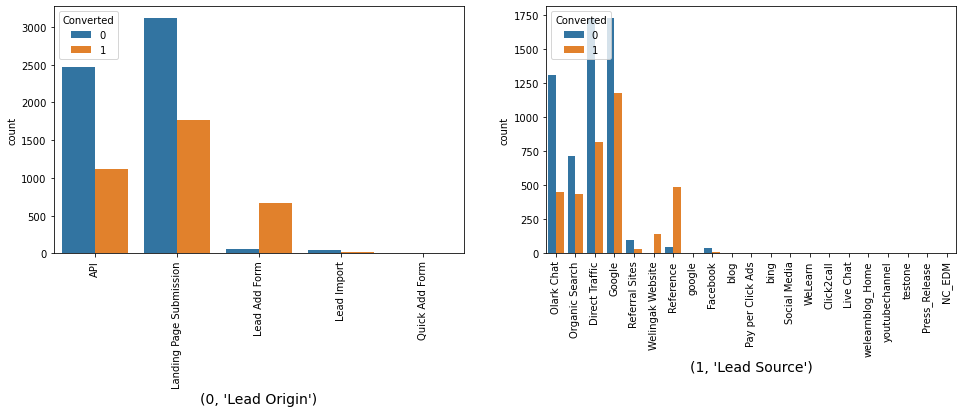

In [44]:
# Creating count plot for Catogrical values 1
plt.figure(figsize=(25,10))
for i in enumerate(cat_col1):
    plt.subplot(2,3,i[0]+1)
    sns.countplot(i[1], hue = 'Converted', data = ld_df)
    plt.xlabel(i,size = 14)
    plt.xticks(rotation = 90)

To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from 'Lead Add Form'

In [45]:
# Replace values as Google, Social Media and Others in Lead Source column for proper analysis
ld_df['Lead Source'] = ld_df['Lead Source'].replace('google','Google')
ld_df['Lead Source'] = ld_df['Lead Source'].replace('Facebook','Social Media')
ld_df['Lead Source'] = ld_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

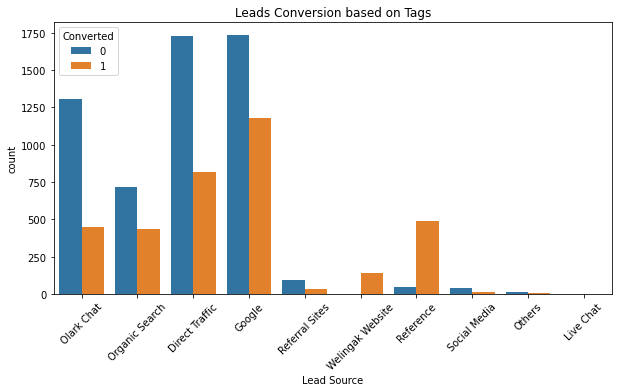

In [46]:
plt.figure(figsize=(10,5))

#Visualising using Countplot

count_fig=sns.countplot(ld_df['Lead Source'], hue=ld_df['Converted'])
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=45)

#Formatting the plot
plt.title("Leads Conversion based on Tags",fontsize=12)
plt.show()

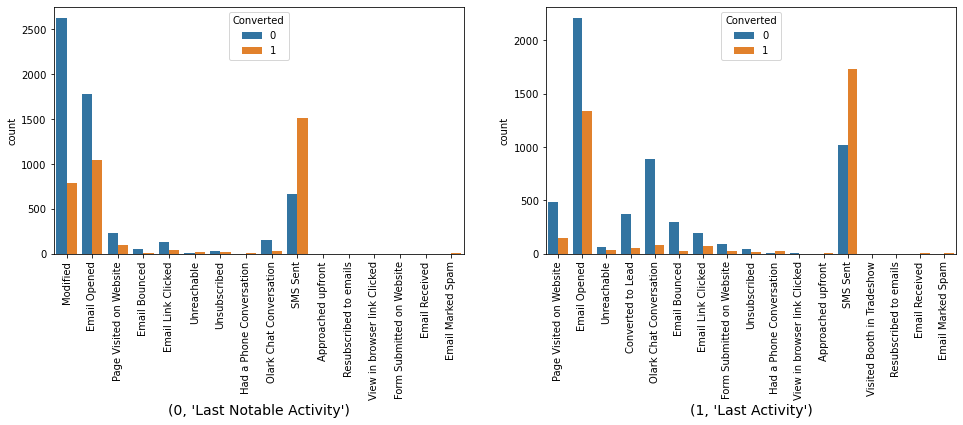

In [47]:
# Creating count plot for Catogrical values 2
plt.figure(figsize=(25,10))
for i in enumerate(cat_col2):
    plt.subplot(2,3,i[0]+1)
    sns.countplot(i[1], hue = 'Converted', data = ld_df)
    plt.xlabel(i,size = 14)
    plt.xticks(rotation = 90)

categories that has less occurance on the Last Notable Activity may be replaced as other notable activity and 
these column is similar to last activity so drop this col
The conversion rateis maximum of lst activity as "Email Opened" 
The conversion rate of SMS sent as last activity is maximum
so we have to make a call to the lead who has opened their email and to whom sms sent to increase the conversion rate


In [48]:
# Replaced specific values to Other_Notable_activity in column Last Notable Activity
ld_df['Last Notable Activity'] = ld_df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                       'Unreachable','Unsubscribed','Email Bounced',
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on Website',
                                                                       'Email Received'],'Other_Notable_activity')
ld_df = ld_df.drop(['Last Activity'],1)

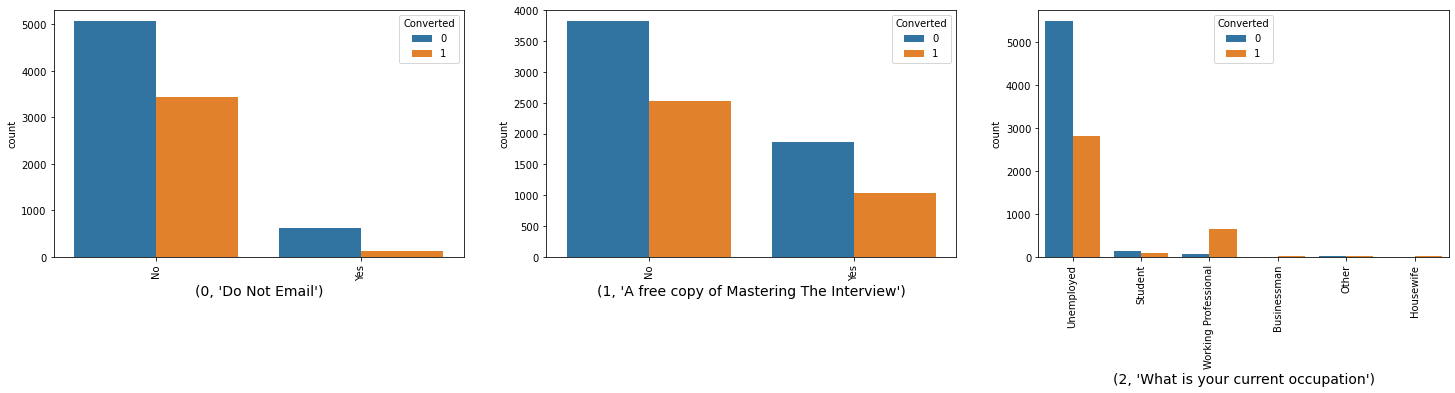

In [49]:
# Creating count plot for Catogrical values 3
plt.figure(figsize=(25,10))
for i in enumerate(cat_col3):
    plt.subplot(2,3,i[0]+1)
    sns.countplot(i[1], hue = 'Converted', data = ld_df)
    plt.xlabel(i,size = 14)
    plt.xticks(rotation = 90)

most of  leads search on google, unemloyed, and sent sms, and opened their Email are converted,

(0, 'Specialization')
(1, 'Tags')
(2, 'City')


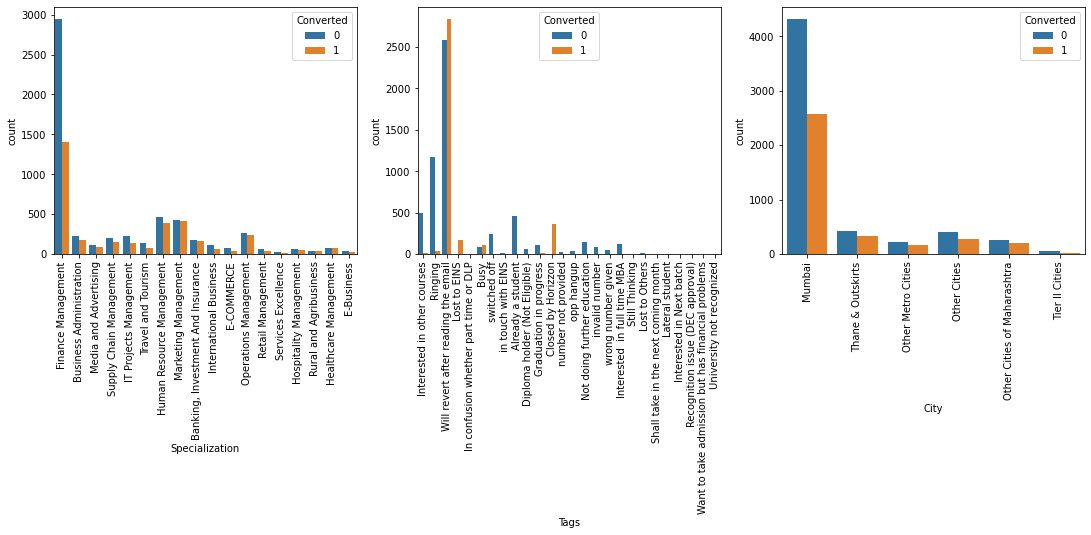

In [50]:
# Creating count plot for Catogrical values 4
plt.figure(figsize = (25, 10))
for i in enumerate(cat_col4):
    plt.subplot(2,4,i[0]+1)
    print(i)
    sns.countplot(i[1], hue = 'Converted', data = ld_df)
    plt.xticks(rotation = 90)

In specialization management course is divided into subgroups so let it bring in one as management

In [51]:
# Replaced specific values to Management_Specializations in column Specialization
ld_df['Specialization'] = ld_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

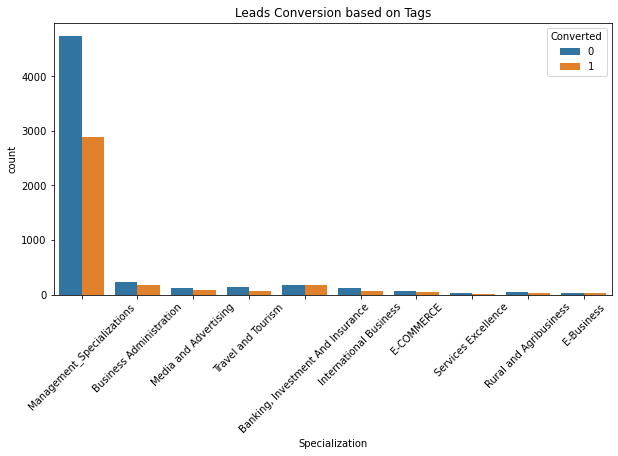

In [52]:
plt.figure(figsize=(10,5))

#Visualising using Countplot

count_fig=sns.countplot(ld_df['Specialization'], hue=ld_df['Converted'])
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=45)

#Formatting the plot
plt.title("Leads Conversion based on Tags",fontsize=12)
plt.show()

In Tag column different tags are given from that we can make one tag as a not eligible or others 

In [53]:
# Replaced specific values to Others_or_not_eligible in column Tags
ld_df['Tags'] = ld_df['Tags'].replace(['In confusion whether part time or DLP','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Lateral student',
                                    'Recognition issue (DEC approval)',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                     'invalid number','wrong number given',
                                 'Interested  in full time MBA''Closed by Horizzon', 'Lost to EINS',
                                 'Lost to Others', 'in touch with EINS '], 'Others_or_not_eligible')

some of the tags are could be converted to positive leads put it in one category

In [54]:
# Replaced specific values to Could_be_Potential in column Tags
ld_df['Tags'] = ld_df['Tags'].replace(['Want to take admission but has financial problems', 'Still Thinking',
                                    'Shall take in the next coming month','Interested in Next batch','Ringing','Busy'],'Could_be_Potential' )

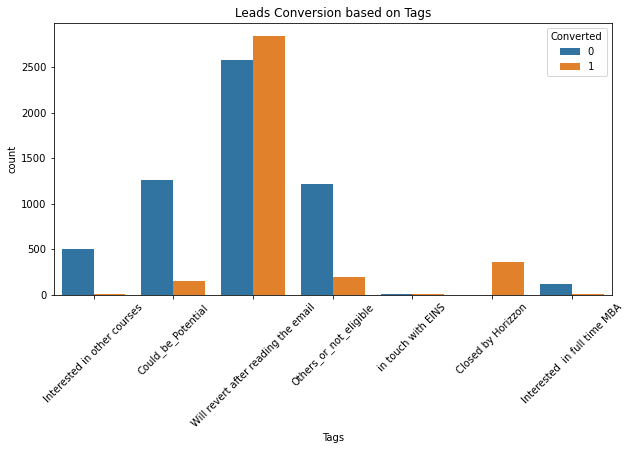

In [55]:
plt.figure(figsize=(10,5))

#Visualising using Countplot

count_fig=sns.countplot(ld_df['Tags'], hue=ld_df['Converted'])
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=45)

#Formatting the plot
plt.title("Leads Conversion based on Tags",fontsize=12)
plt.show()

## Handling Outliers:

Next plot the boxplot for numerical/continuous columns to know the outliers

TotalVisits
Max value is 251.0


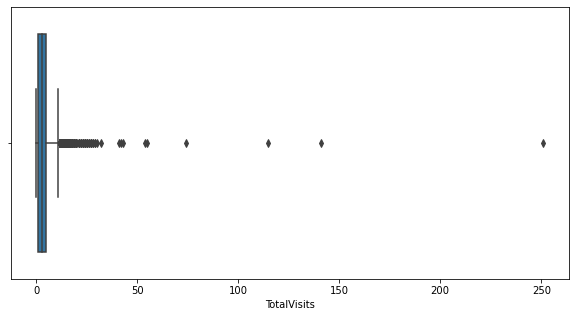

Total Time Spent on Website
Max value is 2272.0


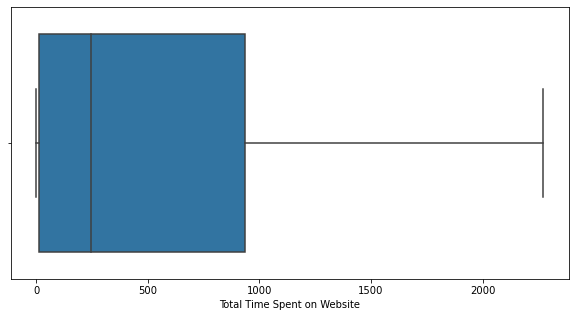

Page Views Per Visit
Max value is 55.0


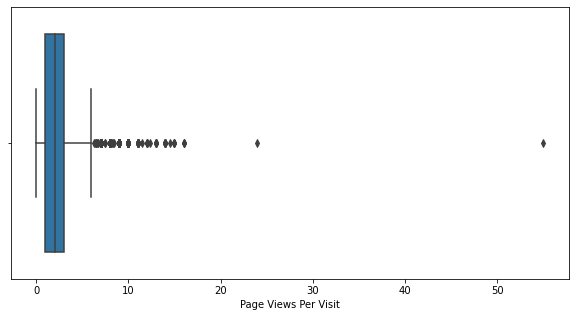

In [56]:
for i in cont_cols:
    print(i)
    print("Max value is",ld_df[i].describe()["max"])
    plt.figure(figsize=(10,5))
    sns.boxplot(ld_df[i])
    plt.show()

After plotting the boxplot for continuous columns it shows the point(values) beyond the upper limit(third quartile) these are the outliers

outiers are found in the following columns
TotalVisits Max value is 251.0
Page Views Per Visit -- Max value is 55.0

In [57]:
Outlier_cols=["TotalVisits","Page Views Per Visit"]

In [58]:
for i in Outlier_cols:                          ##Handling outliers using caping method
    Q1=ld_df[i].describe()["25%"]
    Q3=ld_df[i].describe()["75%"]
    IQR=Q3-Q1
    Upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    
    ld_df[i]=np.where(ld_df[i]<lower_limit,lower_limit,ld_df[i])
    ld_df[i]=np.where(ld_df[i]>Upper_limit,Upper_limit,ld_df[i])


TotalVisits
Max value is 11.0


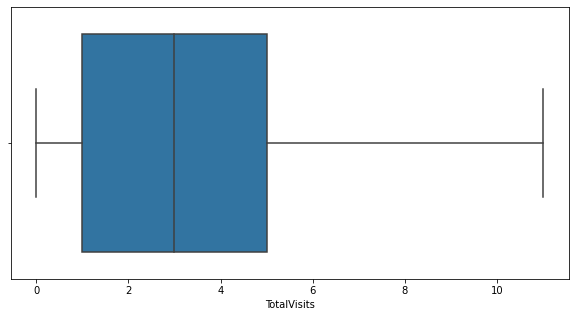

Total Time Spent on Website
Max value is 2272.0


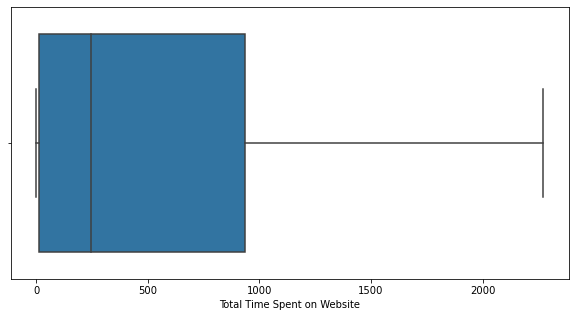

Page Views Per Visit
Max value is 6.0


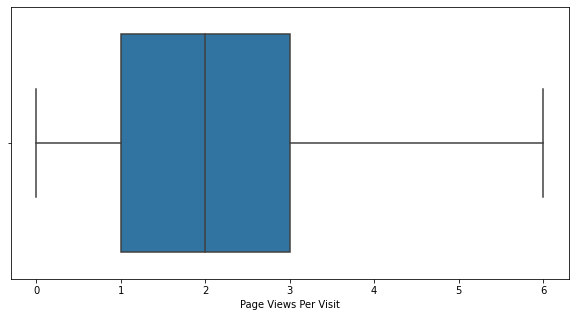

In [59]:
for i in cont_cols:
    print(i)
    print("Max value is",ld_df[i].describe()["max"])
    plt.figure(figsize=(10,5))
    sns.boxplot(ld_df[i])
    plt.show()

Outliers are handled by using caping and flooring method

TotalVisits


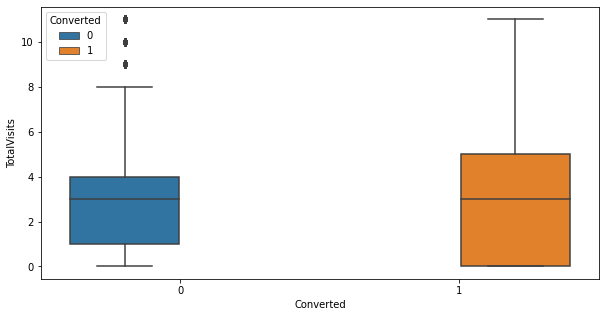

Total Time Spent on Website


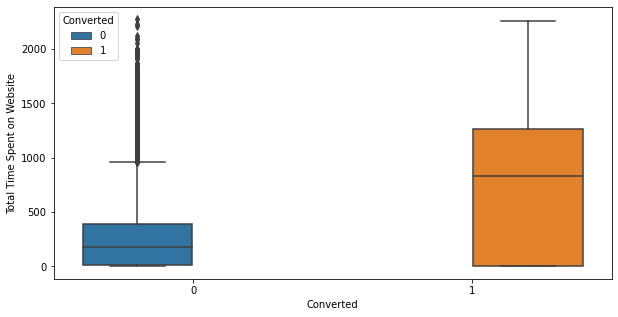

Page Views Per Visit


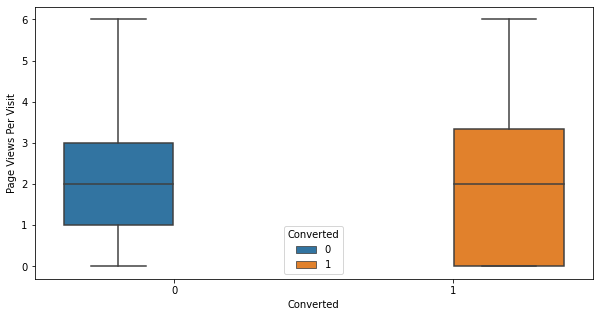

In [60]:
for i in cont_cols:
    print(i)
    plt.figure(figsize=(10,5))
    sns.boxplot(y=ld_df[i], x='Converted',data=ld_df,hue='Converted')
    plt.show()

Median for converted and not converted leads are the same for  'Page Views Per Visit' and for total visits
Leads spending more time on the website are more likely to be converted.

## Step 3: Data Preparation
### Converting some binary variables (Yes/No) to 0/1¶

In [61]:
ld_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [62]:
columns=['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [63]:
# To convert binary variable (Yes/No) to 0/1
ld_df['Do Not Email'] = ld_df['Do Not Email'].map({'Yes': 1, 'No': 0})
ld_df['A free copy of Mastering The Interview'] = ld_df['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [64]:
ld_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Management_Specializations,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Management_Specializations,Unemployed,Could_be_Potential,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Could_be_Potential,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Management_Specializations,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [65]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   Tags                                    9240 non-null   object 
 10  City                                    9240 non-null   obje

For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [66]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_1 = pd.get_dummies(ld_df[['Lead Origin', 'Lead Source', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
ld_df = pd.concat([ld_df, dummy_1], axis=1)

In [67]:
ld_df=ld_df.drop(['Lead Origin', 'Lead Source', 'Last Notable Activity'],1)

In [68]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_2 = pd.get_dummies(ld_df[['Specialization','What is your current occupation','Tags','City']], drop_first=True)
# Adding the results to the master dataframe
ld_df = pd.concat([ld_df, dummy_2], axis=1)

In [69]:
ld_df=ld_df.drop(['Specialization','What is your current occupation','Tags','City'],1)

In [70]:
ld_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Others_or_not_eligible,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [71]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 8   Lead Origin_Lead Import                               9240

Now you can see that you have all variables as numeric.

In [72]:
# Checking the Rate of Conversion
Converted = (sum(ld_df['Converted'])/len(ld_df['Converted'].index))*100
Converted

38.53896103896104

## Step 4: Test-Train Split

In [73]:
# Assigning value to target variable
X=ld_df.drop(["Converted"],axis=1)
y=ld_df["Converted"]

In [74]:
# 70-30 ratio of split between train-test with random_state
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [75]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Others_or_not_eligible,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
4715,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7132,0,2.0,1248,1.00,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8954,0,4.0,387,1.33,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5283,1,11.0,1209,6.00,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3003,0,3.0,1354,3.00,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Step 5: Feature Scaling

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
# Using Standard Scaler() and make X_train learn using fit_transform
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website',
                                                                                            'TotalVisits','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Others_or_not_eligible,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
4715,0,-1.274434,-0.887525,-1.128195,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7132,0,-0.710273,1.386983,-0.433491,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8954,0,-0.524099,-0.182209,0.261212,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5283,1,2.110536,1.315905,2.692673,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3003,0,0.418051,1.580170,-0.086140,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Conversion rate is about 38%

In [78]:
# Correlation between different numerical variables for both the Converted and not-converted cases
correlation = ld_df.corr()
correlation

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Others_or_not_eligible,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Do Not Email,1.000000,-0.135580,0.000337,-0.046374,0.019670,0.055762,0.095304,-0.020983,-0.017529,0.035416,...,-0.011791,-0.027529,0.101624,-0.019465,-0.010593,0.011458,-0.006096,0.039932,-0.004006,0.045447
Converted,-0.135580,1.000000,0.046238,0.362483,-0.005289,-0.039820,-0.051236,0.321702,-0.023695,0.013138,...,-0.083709,-0.179365,-0.214918,0.339760,-0.010032,0.009859,0.025513,0.009576,0.039189,-0.008779
TotalVisits,0.000337,0.046238,1.000000,0.351107,0.753953,0.294352,0.443097,-0.258802,-0.047693,-0.000791,...,-0.000487,-0.006037,-0.001466,-0.072970,-0.005893,0.087005,0.061886,0.072857,0.097627,0.023310
Total Time Spent on Website,-0.046374,0.362483,0.351107,1.000000,0.360425,0.168298,0.276009,-0.139681,-0.034926,0.032831,...,-0.018572,-0.056486,-0.060959,0.067134,-0.002815,0.054251,0.066759,0.051112,0.074099,0.020840
Page Views Per Visit,0.019670,-0.005289,0.753953,0.360425,1.000000,0.299516,0.553423,-0.297954,-0.055373,-0.001492,...,0.009782,0.007544,0.000584,-0.092259,-0.007703,0.101777,0.088835,0.101493,0.099333,0.033111
A free copy of Mastering The Interview,0.055762,-0.039820,0.294352,0.168298,0.299516,1.000000,0.569633,-0.180893,-0.052178,-0.007015,...,-0.013717,-0.040111,0.138570,-0.130695,-0.011349,0.184873,0.110010,0.173103,0.046930,0.073007
Lead Origin_Landing Page Submission,0.095304,-0.051236,0.443097,0.276009,0.553423,0.569633,1.000000,-0.307485,-0.081974,-0.011021,...,0.008012,-0.056115,0.118273,-0.146055,-0.014120,0.174705,0.148334,0.159469,0.154902,0.082387
Lead Origin_Lead Add Form,-0.020983,0.321702,-0.258802,-0.139681,-0.297954,-0.180893,-0.307485,1.000000,-0.022461,-0.003020,...,-0.029256,-0.061548,-0.098265,0.042243,-0.010467,-0.049817,-0.043837,-0.054005,-0.002121,-0.021545
Lead Origin_Lead Import,-0.017529,-0.023695,-0.047693,-0.034926,-0.055373,-0.052178,-0.081974,-0.022461,1.000000,-0.000805,...,0.003820,-0.000329,-0.013216,-0.017979,-0.002790,0.004919,0.112127,0.005229,-0.012742,-0.006953
Lead Origin_Quick Add Form,0.035416,0.013138,-0.000791,0.032831,-0.001492,-0.007015,-0.011021,-0.003020,-0.000805,1.000000,...,-0.001178,-0.002522,-0.004409,0.008724,-0.000375,-0.002946,-0.002373,0.050236,-0.003097,-0.000935


### Step 6: Model Building


Running First Training Model

In [79]:
import statsmodels.api as sm

In [80]:
# logistic regression model_1
X_train=sm.add_constant(X_train)
lm_1=sm.GLM(y_train,X_train, family=sm.families.Binomial())

In [81]:
lm_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6418
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2162.3
Date:                Sun, 01 Jan 2023   Deviance:                       4324.6
Time:                        22:25:48   Pearson chi2:                 7.88e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4849
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    5.6429      1.544      3.654      0.000       2.616       8.670
Do Not Email                                            -1.5268      0.200     -7.649      0.000      -1.918      -1.136
TotalVisits                                             -0.2439      0.069     -3.531      0.000      -0.379      -0.109
Total Time Spent on Website                              1.0766      0.045     23.687      0.000       0.988       1.166
Page Views Per Visit                                     0.2349      0.062      3.813      0.000       0.114       0.356
A free copy of Mastering The Interview                   0.0201      0.122      0.165      0.869      -0.219       0.259
Lead Origin_Landing Page Submission                     -0.1106      0.125     -0.883      0.377      -0.356       0.135
Lead Origin_Lead Add Form                                2.6821      0.581      4.613      0.000       1.543       3.822
Lead Origin_Lead Import                                 -0.0082      1.440     -0.006      0.995      -2.830       2.814
Lead Origin_Quick Add Form                              23.4269   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                       0.2415      0.129      1.869      0.062      -0.012       0.495
Lead Source_Live Chat                                   21.5612   9.26e+04      0.000      1.000   -1.82e+05    1.82e+05
Lead Source_Olark Chat                                   0.5860      0.178      3.299      0.001       0.238       0.934
Lead Source_Organic Search                               0.1275      0.151      0.843      0.399      -0.169       0.424
Lead Source_Others                                      -0.1934      0.843     -0.229      0.819      -1.846       1.459
Lead Source_Reference                                    0.3829      0.629      0.609      0.543      -0.850       1.616
Lead Source_Referral Sites                              -0.0533      0.351     -0.152      0.879      -0.741       0.634
Lead Source_Social Media                                 0.8970      1.366      0.657      0.511      -1.780       3.574
Lead Source_Welingak Website                            23.0048   1.27e+04      0.002      0.999   -2.48e+04    2.49e+04
Last Notable Activity_Email Opened                       0.2286      0.287      0.796      0.426      -0.335       0.792
Last Notable Activity_Modified                          -0.4423      0.289     -1.531      0.126      -1.008       0.124
Last Notable Activity_Olark Chat Conversation           -1.6145      0.447     -3.610      0.000      -2.491      -0.738
Last Notable Activity_Other_Notable_activity             1

### Step 7: Feature Selection Using RFE

In [82]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [83]:
from sklearn.feature_selection import RFE
rfe=RFE(lg,n_features_to_select=15) # running Recursive Feature Elimination(RFE) with 15 variables as output
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [84]:
# Check which are supported
rfe.support_

array([False,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False])

In [85]:
# List the Zip columns,support and ranking for it
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('const', False, 32),
 ('Do Not Email', True, 1),
 ('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('A free copy of Mastering The Interview', False, 34),
 ('Lead Origin_Landing Page Submission', False, 28),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Origin_Quick Add Form', False, 17),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Live Chat', False, 31),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Others', False, 24),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Notable Activity_Email Opened', False, 29),
 ('Last Notable Activity_Modified', False, 3),
 ('Last Notable Activity_Olark Chat Conversation', True, 1),
 ('Last Notable Activity_Other_Notable_activity', True, 1),
 ('Last Notable Activity

In [86]:
# Put all the columns selected by RFE in the variable 'col'

col=X_train.columns[rfe.support_]
len(col)

15

In [87]:
X_train.columns[~rfe.support_]

Index(['const', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your cur

##### Assessing the model with StatsModels

In [88]:
# Assign constant to X_train_sm, create Generalized Linear Model
X_train_sm=sm.add_constant(X_train[col])
lm_2=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=lm_2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2226.0
Date:                Sun, 01 Jan 2023   Deviance:                       4452.1
Time:                        22:25:55   Pearson chi2:                 7.77e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4747
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [89]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4715    0.171939
7132    0.668987
8954    0.171743
5283    0.053536
3003    0.710308
478     0.171939
1352    0.730142
3166    0.976013
7700    0.020640
2647    0.036130
dtype: float64

In [90]:
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred[:10]

array([0.17193926, 0.6689867 , 0.17174315, 0.0535356 , 0.71030825,
       0.17193926, 0.73014196, 0.97601281, 0.02064032, 0.03613013])

Creating a dataframe with the actual lead converted and  the predicted conversion probabilities

In [91]:
y_train_pred_final=pd.DataFrame({'converted_lead':y_train.values, 'conv_lead_prob':y_train_pred})
y_train_pred_final['lead_No']=y_train.index
y_train_pred_final.head()

,converted_lead,conv_lead_prob,lead_No
0,0,0.171939,4715
1,1,0.668987,7132
2,0,0.171743,8954
3,0,0.053536,5283
4,0,0.710308,3003


Creating new column 'predicted' with 1 if conv_lead_prob > 0.5 else 0

In [92]:
y_train_pred_final["predicted"]=y_train_pred_final['conv_lead_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,converted_lead,conv_lead_prob,lead_No,predicted
0,0,0.171939,4715,0
1,1,0.668987,7132,1
2,0,0.171743,8954,0
3,0,0.053536,5283,0
4,0,0.710308,3003,1


In [93]:
from sklearn import metrics

In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.converted_lead, y_train_pred_final.predicted )
print(confusion)

[[3658  326]
 [ 535 1949]]


In [95]:
#Lets check Accuracy
print("accuracy_score")
print(metrics.accuracy_score(y_train_pred_final["converted_lead"],y_train_pred_final["predicted"]))

accuracy_score
0.8668831168831169


In [96]:
# cheking correlation
ld_df.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Others_or_not_eligible,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Do Not Email,1.000000,-0.135580,0.000337,-0.046374,0.019670,0.055762,0.095304,-0.020983,-0.017529,0.035416,...,-0.011791,-0.027529,0.101624,-0.019465,-0.010593,0.011458,-0.006096,0.039932,-0.004006,0.045447
Converted,-0.135580,1.000000,0.046238,0.362483,-0.005289,-0.039820,-0.051236,0.321702,-0.023695,0.013138,...,-0.083709,-0.179365,-0.214918,0.339760,-0.010032,0.009859,0.025513,0.009576,0.039189,-0.008779
TotalVisits,0.000337,0.046238,1.000000,0.351107,0.753953,0.294352,0.443097,-0.258802,-0.047693,-0.000791,...,-0.000487,-0.006037,-0.001466,-0.072970,-0.005893,0.087005,0.061886,0.072857,0.097627,0.023310
Total Time Spent on Website,-0.046374,0.362483,0.351107,1.000000,0.360425,0.168298,0.276009,-0.139681,-0.034926,0.032831,...,-0.018572,-0.056486,-0.060959,0.067134,-0.002815,0.054251,0.066759,0.051112,0.074099,0.020840
Page Views Per Visit,0.019670,-0.005289,0.753953,0.360425,1.000000,0.299516,0.553423,-0.297954,-0.055373,-0.001492,...,0.009782,0.007544,0.000584,-0.092259,-0.007703,0.101777,0.088835,0.101493,0.099333,0.033111
A free copy of Mastering The Interview,0.055762,-0.039820,0.294352,0.168298,0.299516,1.000000,0.569633,-0.180893,-0.052178,-0.007015,...,-0.013717,-0.040111,0.138570,-0.130695,-0.011349,0.184873,0.110010,0.173103,0.046930,0.073007
Lead Origin_Landing Page Submission,0.095304,-0.051236,0.443097,0.276009,0.553423,0.569633,1.000000,-0.307485,-0.081974,-0.011021,...,0.008012,-0.056115,0.118273,-0.146055,-0.014120,0.174705,0.148334,0.159469,0.154902,0.082387
Lead Origin_Lead Add Form,-0.020983,0.321702,-0.258802,-0.139681,-0.297954,-0.180893,-0.307485,1.000000,-0.022461,-0.003020,...,-0.029256,-0.061548,-0.098265,0.042243,-0.010467,-0.049817,-0.043837,-0.054005,-0.002121,-0.021545
Lead Origin_Lead Import,-0.017529,-0.023695,-0.047693,-0.034926,-0.055373,-0.052178,-0.081974,-0.022461,1.000000,-0.000805,...,0.003820,-0.000329,-0.013216,-0.017979,-0.002790,0.004919,0.112127,0.005229,-0.012742,-0.006953
Lead Origin_Quick Add Form,0.035416,0.013138,-0.000791,0.032831,-0.001492,-0.007015,-0.011021,-0.003020,-0.000805,1.000000,...,-0.001178,-0.002522,-0.004409,0.008724,-0.000375,-0.002946,-0.002373,0.050236,-0.003097,-0.000935


Checking VIF

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif["Features"]=X_train[col].columns
z=X_train[col].shape[1]
vif["VIF"]=[variance_inflation_factor(X_train[col].values,i) for i in range(z)]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,16.66
13,Tags_Will revert after reading the email,11.27
9,Tags_Could_be_Potential,3.92
12,Tags_Others_or_not_eligible,3.52
8,What is your current occupation_Working Profes...,2.34
11,Tags_Interested in other courses,2.02
2,Lead Origin_Lead Add Form,1.46
6,Last Notable Activity_SMS Sent,1.46
3,Lead Source_Welingak Website,1.22
10,Tags_Interested in full time MBA,1.21


In [99]:
#Lead Source_Welingak Website has high p value So let's  drop it.
col=col.drop(["Lead Source_Welingak Website"],1)

In [100]:
# Let's re-run the model using the selected variables
X_train_sm=sm.add_constant(X_train[col])
lm_3=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=lm_3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2235.1
Date:                Sun, 01 Jan 2023   Deviance:                       4470.2
Time:                        22:25:57   Pearson chi2:                 8.10e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4732
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif["Features"]=X_train[col].columns
z=X_train[col].shape[1]
vif["VIF"]=[variance_inflation_factor(X_train[col].values,i) for i in range(z)]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,16.66
12,Tags_Will revert after reading the email,11.27
8,Tags_Could_be_Potential,3.92
11,Tags_Others_or_not_eligible,3.52
7,What is your current occupation_Working Profes...,2.31
10,Tags_Interested in other courses,2.02
5,Last Notable Activity_SMS Sent,1.46
2,Lead Origin_Lead Add Form,1.24
9,Tags_Interested in full time MBA,1.21
0,Do Not Email,1.20


In [102]:
# dropping the column which has high VIF
col=col.drop(['What is your current occupation_Unemployed'],1)

In [103]:
# rebuild the model
X_train_sm = sm.add_constant(X_train[col])
lm_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm_4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2240.9
Date:                Sun, 01 Jan 2023   Deviance:                       4481.9
Time:                        22:25:57   Pearson chi2:                 8.07e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4722
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif["Features"]=X_train[col].columns
z=X_train[col].shape[1]
vif["VIF"]=[variance_inflation_factor(X_train[col].values,i) for i in range(z)]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Notable Activity_SMS Sent,1.46
11,Tags_Will revert after reading the email,1.43
0,Do Not Email,1.20
6,What is your current occupation_Working Profes...,1.18
2,Lead Origin_Lead Add Form,1.16
4,Last Notable Activity_Other_Notable_activity,1.12
7,Tags_Could_be_Potential,1.11
1,Total Time Spent on Website,1.07
10,Tags_Others_or_not_eligible,1.07
3,Last Notable Activity_Olark Chat Conversation,1.03


In [105]:
# drop the above two columns from X_train too
drop_col=["Lead Source_Welingak Website",'What is your current occupation_Unemployed']
X_train=X_train.drop(drop_col,axis=1,inplace=True)

In [106]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4715    0.174982
7132    0.673864
8954    0.168797
5283    0.057514
3003    0.714852
478     0.174982
1352    0.734498
3166    0.974827
7700    0.020565
2647    0.038605
dtype: float64

In [107]:
# Reshape
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17498226, 0.67386411, 0.16879744, 0.05751424, 0.71485163,
       0.17498226, 0.73449801, 0.97482687, 0.02056546, 0.0386052 ])

Creating a dataframe with the actual converted lead and the predicted probabilities

In [108]:
y_train_pred_final=pd.DataFrame({'converted_lead':y_train.values, 'conv_lead_prob':y_train_pred})
y_train_pred_final['lead_No']=y_train.index
y_train_pred_final.head()

,converted_lead,conv_lead_prob,lead_No
0,0,0.174982,4715
1,1,0.673864,7132
2,0,0.168797,8954
3,0,0.057514,5283
4,0,0.714852,3003


In [109]:
y_train_pred_final["predicted"]=y_train_pred_final['conv_lead_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,converted_lead,conv_lead_prob,lead_No,predicted
0,0,0.174982,4715,0
1,1,0.673864,7132,1
2,0,0.168797,8954,0
3,0,0.057514,5283,0
4,0,0.714852,3003,1


In [110]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted_lead, y_train_pred_final.predicted )
print(confusion)

[[3661  323]
 [ 534 1950]]


In [111]:
# Predicted     not_converted    converted
# Actual
# not_converted        3373      458
# converted            700       1659

In [112]:
#Lets check Accuracy
print("accuracy_score of train data")
print(metrics.accuracy_score(y_train_pred_final["converted_lead"],y_train_pred_final["predicted"]))

accuracy_score of train data
0.8675015460729747


## Step 8: Metrics Evaluation

In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
# Let's calculate the sensitivity of  logistic regression model
print("sensitivity:")
TP / float(TP+FN)

sensitivity:


0.785024154589372

In [115]:
# Let us calculate specificity
print("specificity:")
TN / float(TN+FP)

specificity:


0.918925702811245

In [116]:
# Calculate false postive rate - predicting churn when customer does not converted lead
print("false postive rate:")
print(FP/ float(TN+FP))

false postive rate:
0.08107429718875502


In [117]:
# positive predictive value 
print("positive predictive value:")
print (TP / float(TP+FP))

positive predictive value:
0.8578970523537176


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8727056019070322


## Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [119]:
# Function to draw_roc
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted_lead, y_train_pred_final.conv_lead_prob, drop_intermediate = False )

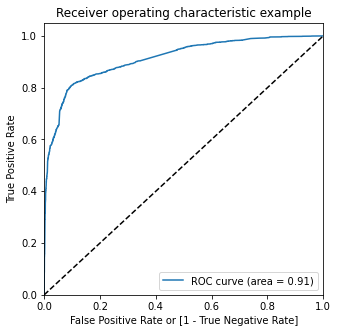

In [121]:
draw_roc(y_train_pred_final.converted_lead, y_train_pred_final.conv_lead_prob)

## Step 9: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [122]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.conv_lead_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted_lead,conv_lead_prob,lead_No,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.174982,4715,0,1,1,0,0,0,0,0,0,0,0
1,1,0.673864,7132,1,1,1,1,1,1,1,1,0,0,0
2,0,0.168797,8954,0,1,1,0,0,0,0,0,0,0,0
3,0,0.057514,5283,0,1,0,0,0,0,0,0,0,0,0
4,0,0.714852,3003,1,1,1,1,1,1,1,1,1,0,0


In [123]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted_lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.660482  0.961755  0.472641
0.2   0.2  0.777984  0.887279  0.709839
0.3   0.3  0.842146  0.838969  0.844127
0.4   0.4  0.864100  0.815217  0.894578
0.5   0.5  0.867502  0.785024  0.918926
0.6   0.6  0.859617  0.738728  0.934990
0.7   0.7  0.831169  0.623188  0.960843
0.8   0.8  0.811688  0.533816  0.984940
0.9   0.9  0.774119  0.423510  0.992721


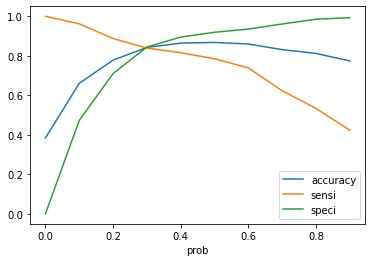

In [124]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [166]:
y_train_pred_final['final_predicted'] = y_train_pred_final.conv_lead_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,converted_lead,conv_lead_prob,lead_No,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.174982,4715,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.673864,7132,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.168797,8954,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.057514,5283,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.714852,3003,1,1,1,1,1,1,1,1,1,0,0,1


In [167]:
print("accuracy_score with cut_off")
metrics.accuracy_score(y_train_pred_final['converted_lead'], y_train_pred_final['final_predicted'])


accuracy_score with cut_off


0.8421459492888065

In [168]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['converted_lead'], y_train_pred_final['final_predicted'] )
confusion2

array([[3363,  621],
       [ 400, 2084]], dtype=int64)

In [169]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [170]:
# Let's see the sensitivity of  logistic regression model
sensitivity=TP / float(TP+FN)
print("sensitivity=",sensitivity) 

sensitivity= 0.8389694041867954


In [171]:
# Let us calculate specificity
specificity=TN / float(TN+FP)
print("specificity with cut_off=",specificity)

specificity with cut_off= 0.8441265060240963


In [172]:
# Calculate false postive rate - predicting churn when customer does not have churned
print("FPR=",FP/ float(TN+FP))

FPR= 0.1558734939759036


In [173]:
# Positive predictive value 
print ("Positive predictive value",TP / float(TP+FP))

Positive predictive value 0.7704251386321627


In [133]:
# Negative predictive value
print ("Negative predictive value",(TN / float(TN+ FN)))


Negative predictive value 0.8937018336433696


## Step 10 :Precision and Recall


In [134]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.converted_lead, y_train_pred_final.predicted )
confusion

array([[3661,  323],
       [ 534, 1950]], dtype=int64)

Precision=TP / TP + FP

In [135]:
Precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])

print("Precision of maodel is :",Precision)   

Precision of maodel is : 0.8578970523537176


Recall=TP / TP + FN

In [136]:
Recall=confusion[1,1]/(confusion[1,0]+confusion[1,1])
print("Recall of maodel is :",Recall)

Recall of maodel is : 0.785024154589372


Using sklearn utilities for the same

In [137]:
from sklearn.metrics import precision_score, recall_score

In [138]:
precision_score(y_train_pred_final.converted_lead, y_train_pred_final.predicted)

0.8578970523537176

In [139]:
recall_score(y_train_pred_final.converted_lead, y_train_pred_final.predicted)

0.785024154589372

### Precision and recall tradeoff

In [140]:
from sklearn.metrics import precision_recall_curve

In [141]:
y_train_pred_final.converted_lead, y_train_pred_final.predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6463    0
 6464    0
 6465    1
 6466    0
 6467    1
 Name: converted_lead, Length: 6468, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       1
        ..
 6463    0
 6464    0
 6465    1
 6466    0
 6467    1
 Name: predicted, Length: 6468, dtype: int64)

In [142]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted_lead, y_train_pred_final.conv_lead_prob)

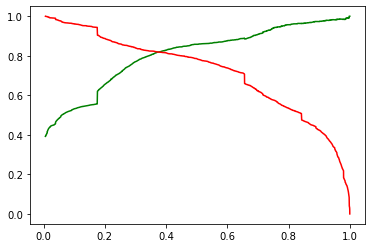

In [143]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [144]:
# Scaling vaiables to numeric
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website',
                                                                                            'TotalVisits','Page Views Per Visit']])

In [145]:
# Select the columns in X_train for X_test 
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm


,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_SMS Sent,What is your current occupation_Working Professional,Tags_Could_be_Potential,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Others_or_not_eligible,Tags_Will revert after reading the email,Tags_in touch with EINS
4608,1.0,0,-0.428249,0,0,0,0,0,0,0,0,0,0,0
7935,1.0,1,0.805598,0,0,0,0,0,0,0,0,0,1,0
4043,1.0,1,-0.883879,0,0,0,0,0,0,0,0,0,1,0
7821,1.0,0,-0.298850,0,0,0,0,1,1,0,0,0,0,0
856,1.0,0,-0.521198,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,1.0,0,-0.887525,0,0,0,0,0,0,0,0,1,0,0
5023,1.0,1,-0.357171,0,0,0,0,0,0,0,0,0,1,0
6661,1.0,0,-0.887525,0,0,0,0,0,0,0,0,1,0,0
2201,1.0,0,-0.652419,0,0,0,0,0,0,0,1,0,0,0


Making predictions on the test set

In [146]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)


In [147]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [148]:
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.968281
1,0,0.162064
2,0,0.034428
3,0,0.192719
4,0,0.234319


In [149]:
# Making prediction using cut off 0.3
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final


,Converted,Conversion_Prob,final_predicted
0,1,0.968281,1
1,0,0.162064,0
2,0,0.034428,0
3,0,0.192719,0
4,0,0.234319,0
...,...,...,...
2767,0,0.038605,0
2768,0,0.056963,0
2769,0,0.038605,0
2770,0,0.006692,0


In [150]:
print("Accuracy on test data")
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

Accuracy on test data


0.8455988455988456

In [151]:
print("confusion matrix")
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

confusion matrix


array([[1419,  276],
       [ 152,  925]], dtype=int64)

In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
print("sensitivity on test data") 
TP/(TP+FN)


sensitivity on test data


0.8588672237697307

In [154]:
print("specificity on test data")
TN/(TN+FP)

specificity on test data


0.8371681415929203

In [155]:
print("Precision on test data")
TP / (TP + FP)

Precision on test data


0.7701915070774354

In [156]:
print("Recall on test data") 
TP / (TP + FN)

Recall on test data


0.8588672237697307

In [157]:
print("Features used in Final Model :")

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model :
-----------------------Feature Importance--------------------
const                                                   3.847218
Do Not Email                                           -1.786786
Total Time Spent on Website                             1.000847
Lead Origin_Lead Add Form                               3.223736
Last Notable Activity_Olark Chat Conversation          -1.274424
Last Notable Activity_Other_Notable_activity            1.828946
Last Notable Activity_SMS Sent                          2.196226
What is your current occupation_Working Professional    2.474702
Tags_Could_be_Potential                                -7.455255
Tags_Interested  in full time MBA                      -7.920524
Tags_Interested in other courses                       -8.194332
Tags_Others_or_not_eligible                            -6.173940
Tags_Will revert after reading the email               -4.509662
Tags_in touch with EINS                                -5.1816

## Conclusion: 
The logistic regression model predicts the probability of the target variable having a certain value, instead of predicting the value of the target variable directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable.

Here, the logistic regression model is used to predict the probabilty of conversion of a customer(lead).

Optimum cut off is chosen to be 0.3 i.e.

any lead with greater than 0.3 probability of converting is predicted as Hot Lead (customer will convert) and any lead with 0.3 or less probability of converting is predicted as Cold Lead (customer will not convert)

## Result on Train data

Accuracy is 84.21%

Sensitivity is 83.89%

Specificity is 84.41%

Precision : 85.78%

Recall 78.50%


## Result on Test data

Accuracy : 84.55%

Sensitivity :85.88%

Specificity :83.71%

Precision : 77%

Recall 85.88%

Roc : 0.91

THANK YOU !!